# Model Training


In [13]:
## MODEL TRAINING.py
# Basic Libraries
from xgboost import XGBRegressor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
## Modelling Libraries:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
import warnings

### Import the CSV Data as Pandas Data Frame


In [3]:
df = pd.read_csv('data/stud.csv')

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Setting up X and Y variables

In [5]:
x = df.drop(columns='math_score',axis=1)
y = df['math_score']

#### Create column transformer with 3 types of transformers

In [6]:
## Will seperate numerical and categorical features , for columnTransformer
num_features = x.select_dtypes(exclude='object').columns
cat_features = x.select_dtypes(include='object').columns

## # Preprocessor Logic:
##### OneHotEncoder → converts categorical features to binary columns
##### StandardScaler → scales numeric features to zero mean & unit variance
##### ColumnTransformer(parent func, assigns the baby funcs stdscalar and onhot..theoir required inputs,) applies each transformer to the right columns and combines results for ML models

In [7]:
# Pipeline Format 
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features)
    ]
)

preprocessor just stores the data there , to put it in actual array formmat, we need fit.transfrom. note: if preprocessor was not the name, and something like shahrukh then x = shahrukh.fit_transform(x) wouldve worked the same

In [25]:
x = preprocessor.fit_transform(x)

In [30]:
x

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]], shape=(1000, 19))

#### Seperate Data into Train and Test Data

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)
x_train.shape, x_test.shape

((800, 19), (200, 19))

Creating Ecvaluation Model to evaluate the predcition and true values ( after we are done with the model development)

###### Pipeline → during training/testing, after predictions are made (model.predict(x_test)), this function is called to evaluate performance before saving or deploying the model.

In [32]:
def evaluate_model(true, predicted):
    mse = mean_squared_error(true, predicted)
    mae = mean_absolute_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)

    return mse, mae, rmse, r2_square
    


In [33]:
# Models

models = {
    "LinearRegression" : LinearRegression(),
    "Lasso" : Lasso(),
    "Ridge" : Ridge(),
    "K-Neighbors Regressor" : KNeighborsRegressor(),
    "Decision Tree Regressor" : DecisionTreeRegressor(),
    "RandomForestRegressor" : RandomForestRegressor(),
    "XGBRegressor" : XGBRegressor(),
    "CatBoostingRegressor" : CatBoostRegressor(verbose=False),
    "AdaBoostRegressor" : AdaBoostRegressor()    
}

In [ ]:
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train) # Train model

    # Making prediction
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    # Evaluate Train and Test dataset
    model_train_mse, model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mse, model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

LinearRegression
Model performance for Training set
- Root Mean Squared Error: 5.3231
- Mean Absolute Error: 4.2667
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3940
- Mean Absolute Error: 4.2148
- R2 Score: 0.8804


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
- R2 Score: 0.8071
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- R2 Score: 0.8253


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3904
- Mean Absolute Error: 4.2111
- R2 Score: 0.8806


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.7077
- Mean Absolute Error: 4.5167
- R2 Score: 0.8555
------------------------

### Results Visualization (DataFrame format)
on the basis of r2 

In [61]:
## Visualzing the Results 
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)


,Model Name,R2_Score
2,Ridge,0.880593
0,LinearRegression,0.880433
8,AdaBoostRegressor,0.854381
5,RandomForestRegressor,0.853125
7,CatBoostingRegressor,0.851632
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,K-Neighbors Regressor,0.783813
4,Decision Tree Regressor,0.763436


## Linear Regression (The OG)
as the lasso and Linear regression have almost similar r2 value

In [71]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(x_train, y_train)

y_pred = lin_model.predict(x_test)
score = r2_score(y_test, y_pred)*100 # will show in percentage format
print("Accuracy of Linear Regression model is %.2f" %score)

Accuracy of Linear Regression model is 88.04


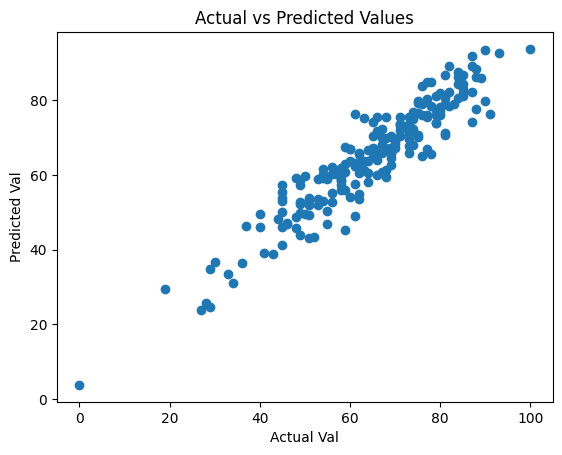

In [73]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Val")
plt.ylabel("Predicted Val")
plt.title("Actual vs Predicted Values")
plt.show()

<Axes: xlabel='math_score'>

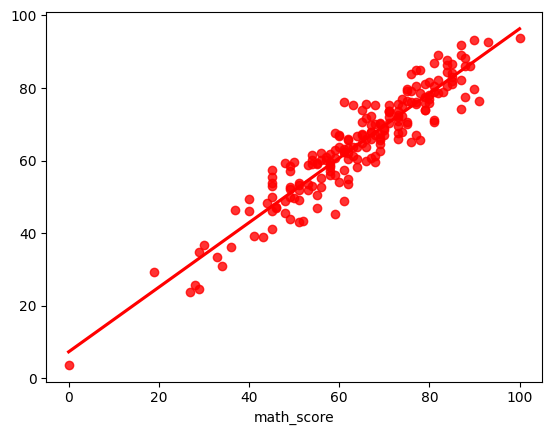

In [88]:
sns.regplot(x=y_test, y=y_pred, ci=None, color="red")

### Diff between actual and predicted values:


In [89]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
